# Loan Application Status Prediction

Description:
This dataset includes details of applicants who have applied for loan. variable like credit history, loan amount, their income, dependents variables is Loan status


Dependent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

In [1]:
# importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data set
df= pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

Observation: Dataset contains the 614 rows and 13 variables 

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Observation: Dataset contains the integers, float and objects  data types 

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation: 
1. dataset contains the null values in "gender, Married,depedents, self employeed loanammount, loan term, credit history " these variables contains the null values 

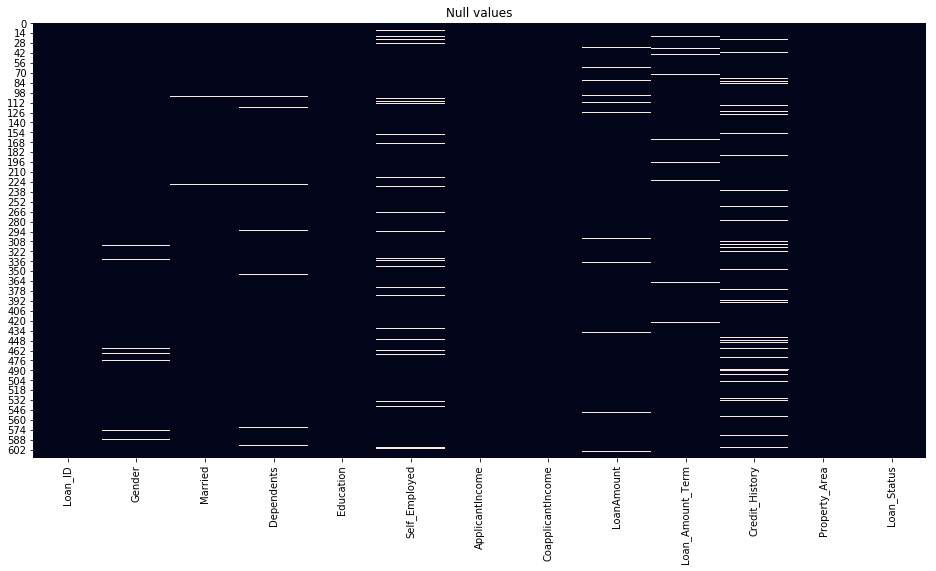

In [6]:
#Heat map to check the null values
plt.figure(figsize=[16,8])
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null values')
plt.show()

Observation: We clearly see that some of the columns contains the null values no we need to fill or drop the rows  

In [7]:
df.shape

(614, 13)

In [27]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation: if we drop NAN the we losse lot of the data so we are filling 

In [28]:
#filling the Nan By mode

g_mode = df['Gender'].mode()
d_mode = df['Dependents'].mode()
s_mode = df['Self_Employed'].mode()
c_mode = df['Credit_History'].mode()


In [29]:

#Credit_History
df['Loan_Amount_Term'].fillna('0', inplace=True)
df['Gender'].fillna(df['Gender'].mode(), inplace=True)
df['Dependents'].fillna(df['Dependents'].mode(), inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode(), inplace=True)

In [30]:
df.shape

(614, 13)

In [31]:
df1 =df.isna()
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


Male      489
Female    112
Name: Gender, dtype: int64


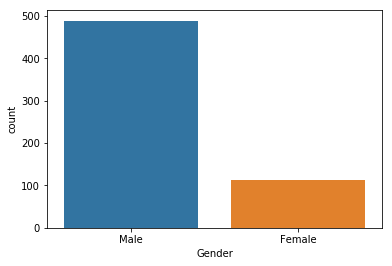

In [32]:
print(df['Gender'].value_counts())
sns.countplot(df['Gender'])

Observation: Male population is high in dataset compare to Female

Y    422
N    192
Name: Loan_Status, dtype: int64


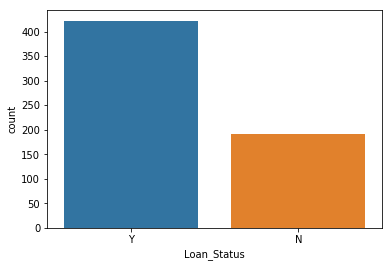

In [33]:
print(df['Loan_Status'].value_counts())
sns.countplot(df['Loan_Status'])
plt.show()

Observation: Target variables have two classification "Y" and "N"  dataset is imbalnced need to treat 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


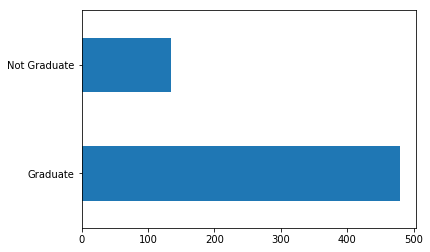

In [34]:
print(df['Education'].value_counts())
df['Education'].value_counts(normalize=False).plot(kind='barh')

OBservation: Variable Education Have two classification in that Graduate is the highest population

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


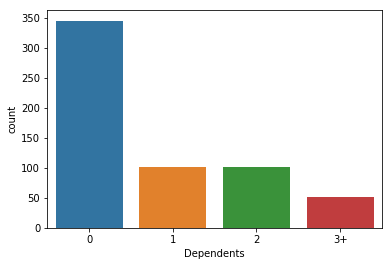

In [35]:
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'])
plt.show()

Observation: Highest applicants not have any dependents perons on them  , applicants have higest dependents are 3+

In [36]:
df.dropna(inplace=True)


In [37]:
df.shape


(492, 13)

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,492.0,5334.483740,5608.526089,150.0,2898.75,3858.5,5823.00,81000.0
CoapplicantIncome,492.0,1575.558780,2594.728627,0.0,0.00,1084.5,2259.25,33837.0
LoanAmount,492.0,144.136179,79.765056,9.0,100.00,128.0,170.00,600.0
Credit_History,492.0,0.845528,0.361768,0.0,1.00,1.0,1.00,1.0


Observation : 
1. Mean of the income is grater then the mode of the income
2. Max and min value of the applicant income  have lot of differance may  include outliers in the column 
3. Count of the row are differnent each variable may have missing values 

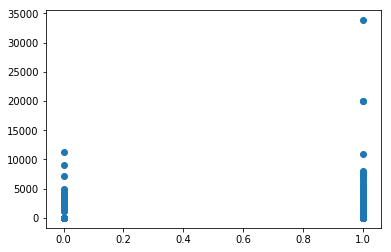

In [199]:
plt.scatter(df['Credit_History'],df['CoapplicantIncome'])

Observation: We see clearly see that outliers in the dataset , he is making the 350000 income 

#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_hmap, annot=True)
plt.show()

In [113]:
#Encoding the Cateogorical variables 
#label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
    
#df = pd.get_dummies(df, columns=['Loan_Status'])
#df = pd.get_dummies(df, columns=['Gender'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Loan_ID'] = le.fit_transform(df['Loan_ID'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])



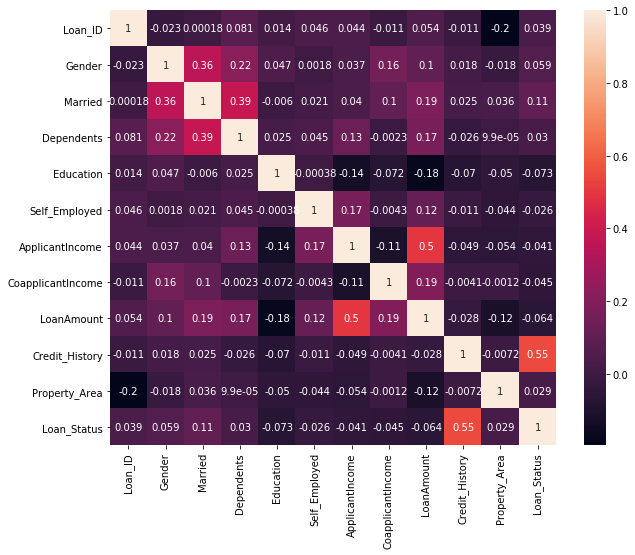

In [114]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_hmap, annot=True)
plt.show()

Observation: 
1. Variable credit history have positve relation with target variable Loan Status 55%
2. Application income and loan amount have positive relation 50%


In [39]:
#### to display the
corr_matrix=df.corr()
corr_matrix['Loan_Status'].sort_values(ascending = False)

KeyError: 'Loan_Status'

Observation:
1. Variables Credit_History, Married, Gender, Loan_ID, Dependents, Property_Area have the positive relation with target Variables 

2. Variables Self_Employed,ApplicantIncome, CoapplicantIncome,LoanAmount, Education negative relation with traget variables 


In [40]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

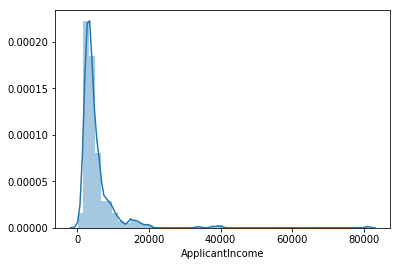

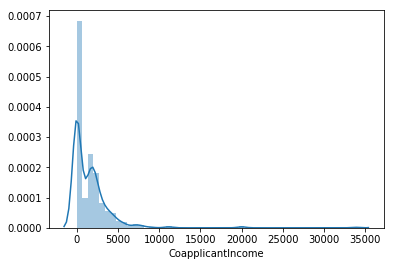

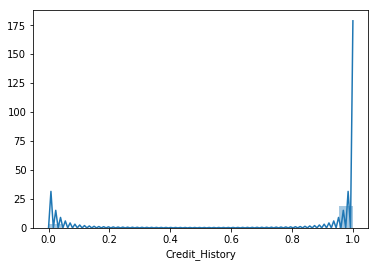

In [41]:
columns =['ApplicantIncome', 'CoapplicantIncome','Credit_History']
        
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

Observation: Application income data is not distributed properly its Righ skewed, Co Applicant income 

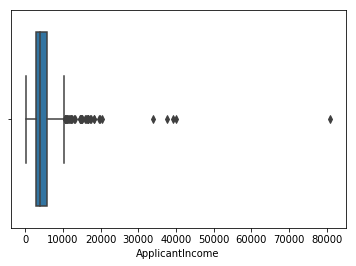

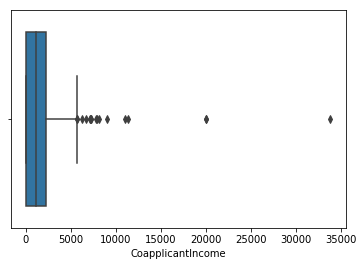

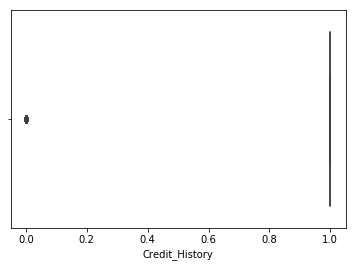

In [42]:
# with the help of box plot checking the outliers in data set 
for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

Observation: 
Applicant income, co-applicant income variables have outliers 

In [43]:
#Spliting the data into Feature variables (X) and target variables (y)
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

In [44]:
# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [45]:
#import library
from collections import Counter
#import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
counter =Counter(y_train)
print('Before', counter)

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

counter =Counter(y_smote)
print('after', counter)

ModuleNotFoundError: No module named 'imblearn'

In [46]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360,1.0,Urban,Y


In [47]:
#decision Tree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
#dt.fit(x_smote,y_smote)   #over sampled data using here
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))


ValueError: could not convert string to float: 'LP001713'

Observation:
1. Decsison Tree classification model accuracy we getting is :78.72%
2. Decsison Tree classification model ovsersample balanced data we get accuracy is : 100%

In [50]:
#logistic regression 
#Model building
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
#lg.fit(x_smote,y_smote)   #Over sampled data

lg.fit(x_train,y_train)
pred =lg.predict(x_test)

print(pred)
print("Accuracy_score", accuracy_score(y_test,pred))

ValueError: could not convert string to float: 'Urban'

Observation:
1. Logestic regrestion model we get the accuracy rate: 81%  with imbalanced data
2. Logestic regrestion model we get the accuracy rate: 72%  with balanced data


In [48]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

NameError: name 'pred' is not defined

Observation: Confusion matrix we getting, 
True Positive is : 4657          True negative: 268
False negative is : 1079          True negative is: 508


In [49]:
#AUC ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_prob =lg.predict_proba(x_test)[:,1]
y_pred_prob

In [ ]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('Loan staus N ')
plt.ylabel('Loan staus Y')
plt.title('Losgistic Regression')
plt.show()

In [ ]:
#print(auc_score)

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt, x,y, cv=5)
print(score)
print(score.mean())

We getting the cross validation  accuracy score is :81 

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

RandomForest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
#rf.fit(x_smote, y_smote)  #balanced data
rf.fit(x_train, y_train)
rf_pred =rf.predict(x_test)
print('accuracy score', rf_pred)
print(accuracy_score(y_test,rf_pred)) 
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

Observation:
1. we are getting the RandomForest model accuracy is 86% using imbalanced data 
2. we are getting the RandomForest model accuracy is 100% using balanced data

In [ ]:
## SVM model

In [ ]:
#importing the svm model
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
#svclassifier.fit(x_smote, y_smote)  #balanced data
sv_pred = svclassifier.predict(x_test)
print(accuracy_score(y_test,sv_pred))
print(confusion_matrix(y_test,sv_pred))
print(classification_report(y_test,sv_pred))

Observation:
1. we are getting SVM Model accuracy is 78%

In [206]:
#Grid Search
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(x_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(x_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.6767676767676768
Precision Score : 0.6767676767676768
Recall Score : 1.0
F1 Score : 0.8072289156626505


array([[ 0, 32],
       [ 0, 67]], dtype=int64)

#### --- Saving the Model----
Random Forest and Decsion Tree classification model getting the highest accuarcy so we are saving the Decision Tree model

In [207]:
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(dt, 'dt.pkl')
  
# Load the model from the file
dt_joblib = joblib.load('dt.pkl') 
  
# Use the loaded model to make predictions
#dt_joblib.predict(x_test)